In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
band = 'J'

In [3]:
# Load in data
tbl = pd.read_csv('preprocessed_data_avg.csv')
tbl = tbl[tbl['Filter']==band] 

# load in new nH's 
new_nh = pd.read_csv('FSRED Mags - different_nH.csv')



In [4]:
def calc_L(nH, band, mag_cal, d):
    # Calculate the optical extinction from the hydrogen column density
    Av = nH / (1.79*10**(21))

    # Translate visual extinction to infrared extinction in the used filter
    if band == 'J':
        A = 0.282 * Av
    elif band == 'H':
        A = 0.175 * Av
    elif band == 'Ks':
        A = 0.112 * Av

    # Deredden the calibrated magnitudes of all detected counterparts
    mag_dered = mag_cal - A
    
    
    # Calculate flux density 
    if band == 'J':
        W_eff = 2214.62 # A
        l_eff = 12287.26 # A
    elif band == 'H':
        W_eff = 2769.45 # A 
        l_eff = 16039.55 # A
    elif band == 'Ks':
        W_eff = 3163.40 # A
        l_eff = 21315.89 # A

    c = 2.9979e18 # A/s
    F_nu = 10**(-(mag_dered+48.60)/2.5) # erg/s/cm2/Hz   
    F_lamb = F_nu * c / l_eff**2 # erg/s/cm2/A
    Flux = W_eff * F_lamb 
    
    d_cm = 3.08567758128e21 * float(d) 
    L = 4 * np.pi * d_cm**2 * Flux
    logL = np.log10(L)
    
    return L, logL

In [5]:
for index, row in tbl.iterrows():

    if row['Source'] in new_nh['Source'].tolist():
        print(row['Source'])
        print(row['log_L_NIR'])

        mag_cal = row['Mag_raw'] - row['zp_offset']
#         nH = row['nH'] 
        L_old = row['log_L_NIR']
        nH = new_nh[new_nh['Source'] == row['Source']]['nH'].values[0] * 1e22
        d = row['Distance (kpc)']
        L, logL = calc_L(nH, band, mag_cal, d)
        print(logL)
        row['log_L_NIR'] = logL
#         tbl[n, 'log_L_NIR'] = logL
        tbl['log_L_NIR'] = tbl['log_L_NIR'].replace([L_old], logL)
        print(row['log_L_NIR'])
        print()
        
print(tbl[tbl['Source']=='2S_0918-549']['log_L_NIR'])


2S_0918-549
33.80751629706235
33.62129384591911
33.62129384591911

IGR_J1706.2-6143
32.1450007894879
32.20900286413756
32.20900286413756

IGR_J1706.2-6143
32.105586670311766
32.160831790802156
32.160831790802156

MAXI_J1305-704
32.87725150386046
32.93449434398194
32.93449434398194

4U_1708-40
33.39194680008659
35.7074827034877
35.7074827034877

XTE_J1710-281
32.933308951060944
32.94092564568
32.94092564568

4U_1735-44
33.5558421364622
33.688407391000176
33.688407391000176

GS_1826-24
33.01454230238293
33.413877300785536
33.413877300785536

Ser_X-1
33.55358214273131
33.91412127021626
33.91412127021626

4U_1626-67
32.728335051014724
32.77965354779536
32.77965354779536

4U_1915-05
32.47775022991445
32.68917880771224
32.68917880771224

GX_9+9
34.47758467588791
34.61199605267928
34.61199605267928

4U_1702-429
32.77760552154221
33.44821577070612
33.44821577070612

11    33.621294
Name: log_L_NIR, dtype: float64


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


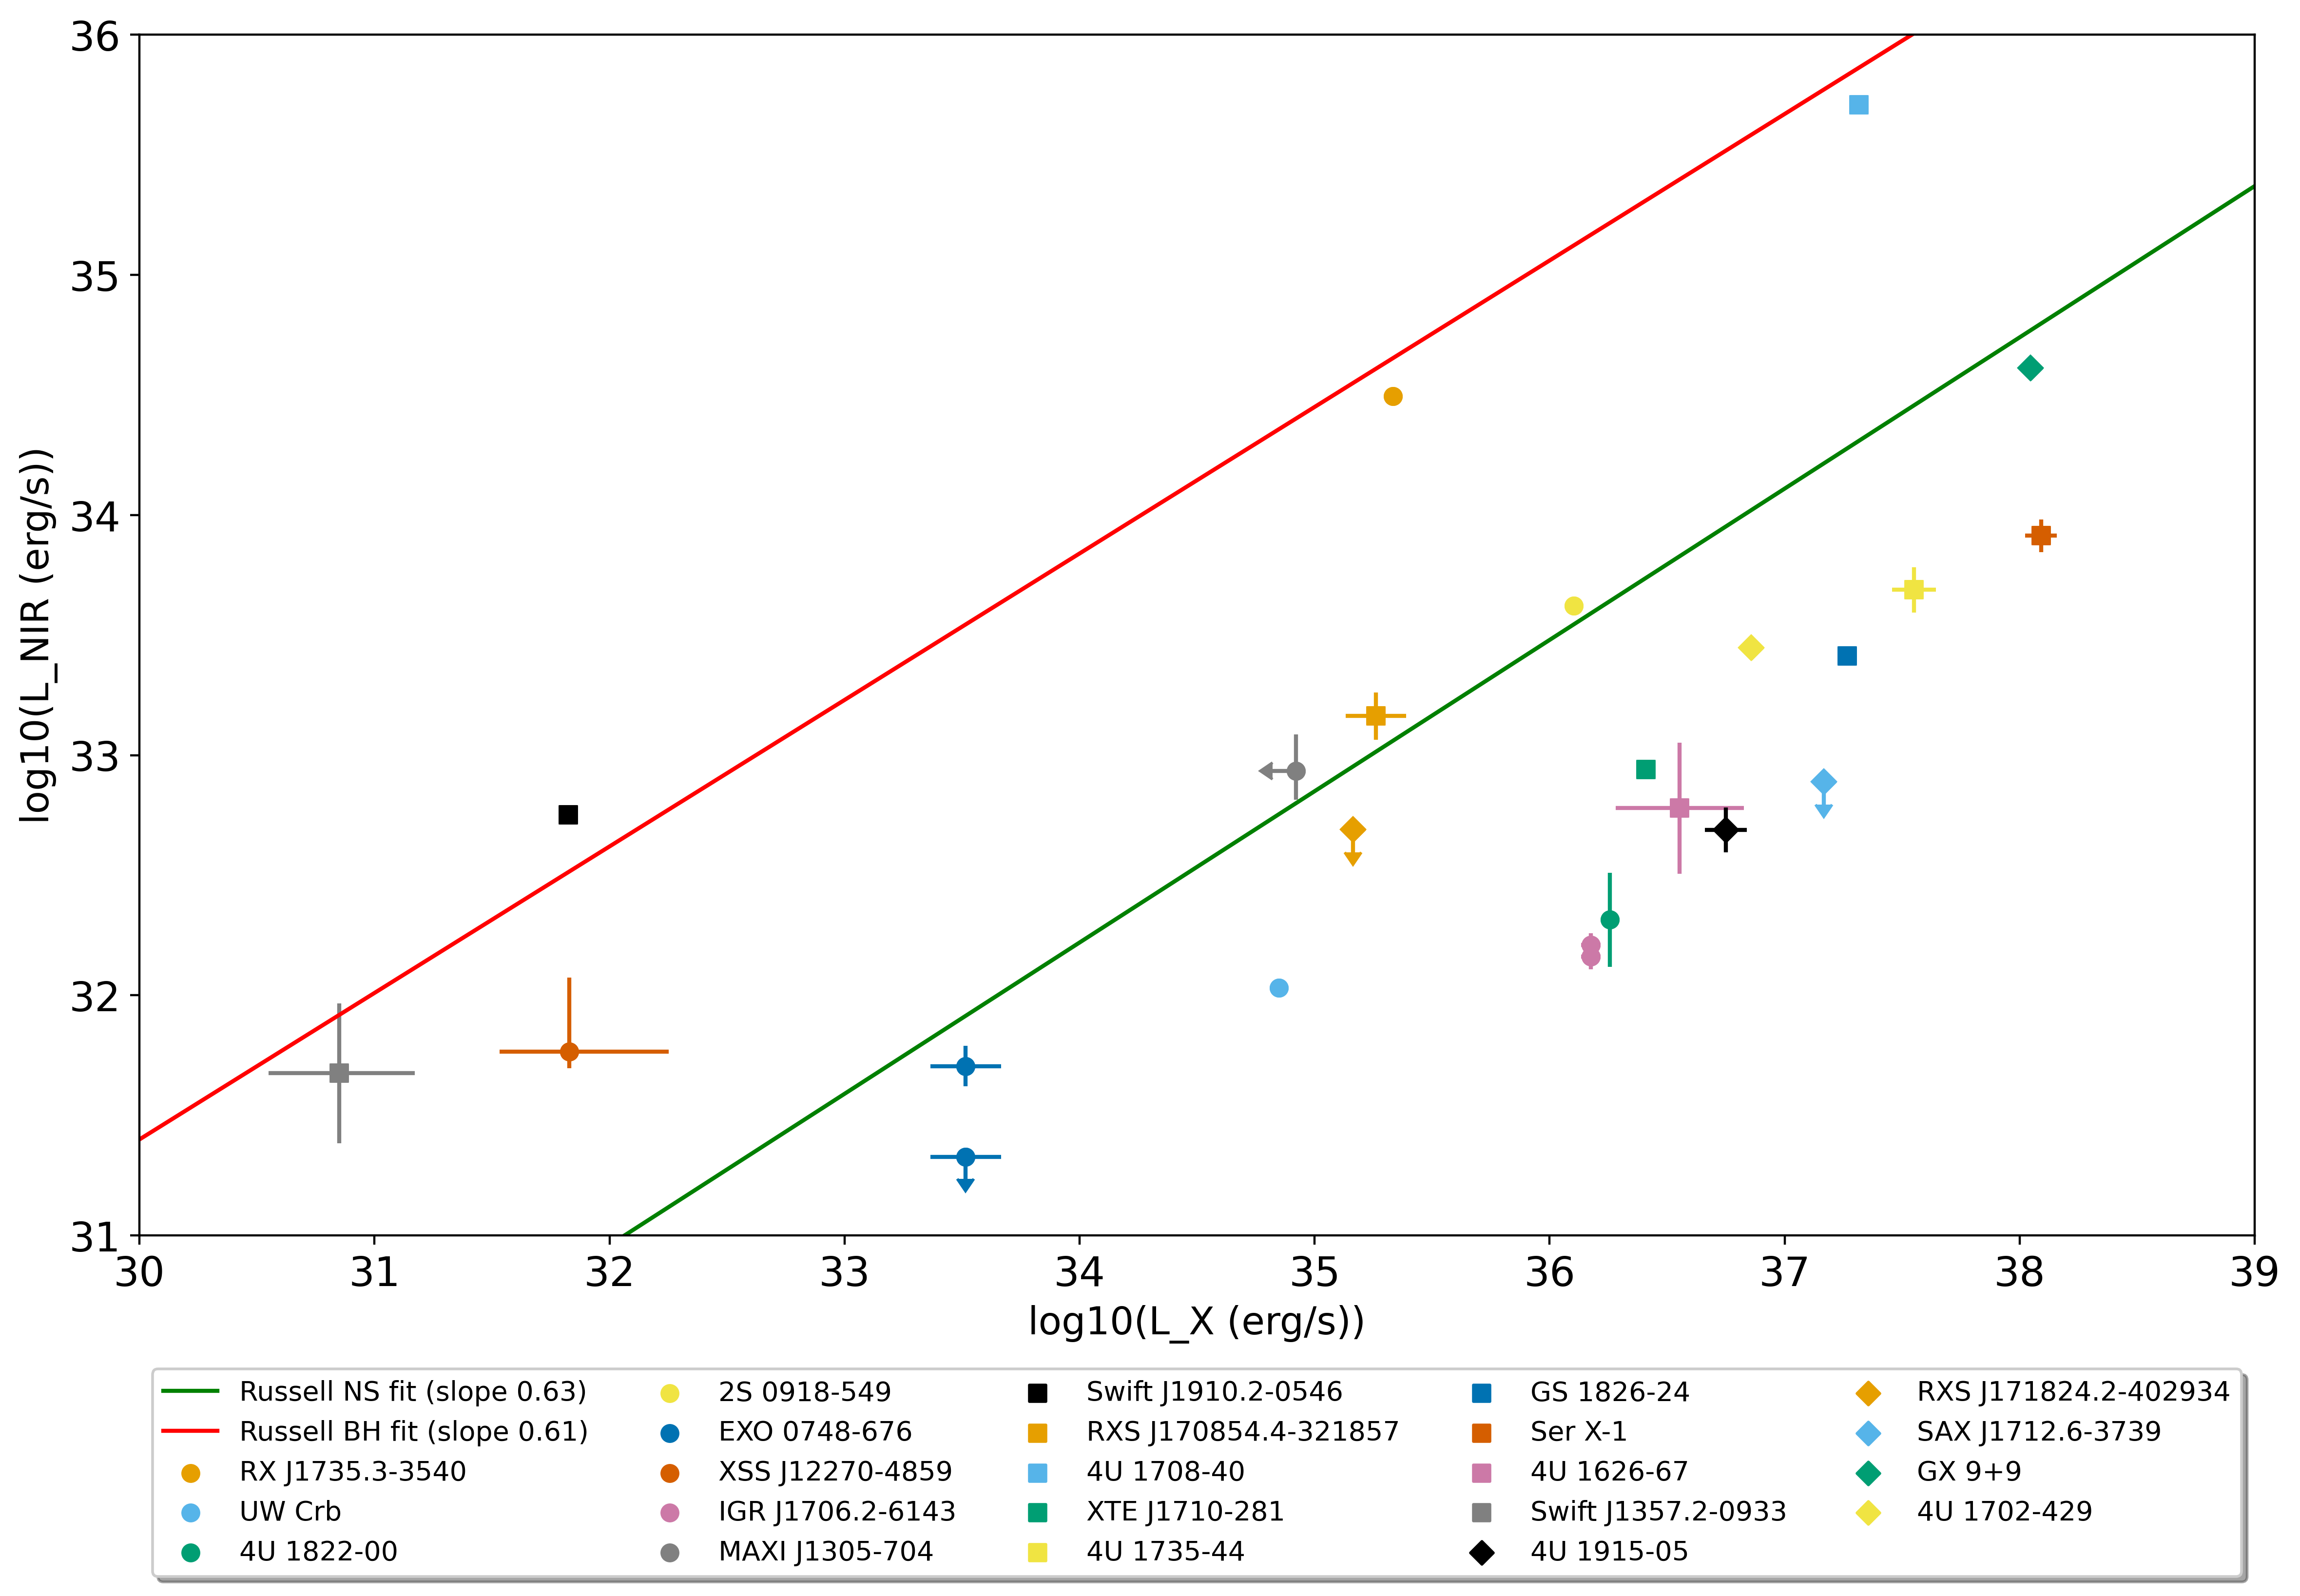

In [6]:
def plotfunc_scatter(ax, tbl, color, shape, label): 
    
    # Remove underscore from labels
    label = label.replace('_', ' ')
    # Plot regular data points 
    ax.scatter(tbl['log_L_X'], tbl['log_L_NIR'], label=label, c=color, marker=shape, zorder=10) 
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR'], yerr=[[tbl['log_L_NIR_errlow']], [tbl['log_L_NIR_errup']]], xerr=[[tbl['log_L_X_errlow']], [tbl['log_L_X_errup']]], marker=shape, fmt='o', color=color)

    # Plot points with only upplim on NIR luminosity
    ax.scatter(tbl['log_L_X'], tbl['log_L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)      
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR_upplim'], yerr=[tbl['log_L_NIR_upplim']*arrow_scale], xerr=[[tbl['log_L_X_errlow']], [tbl['log_L_X_errup']]], uplims = True, marker=shape, fmt='o', color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.scatter(tbl['log_L_X_upplim'], tbl['log_L_NIR'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR'], yerr=[[tbl['log_L_NIR_errlow']], tbl[['log_L_NIR_errup']]], xerr=[tbl['log_L_X_upplim']*arrow_scale], xuplims = True, marker=shape, fmt='o', color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.scatter(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], yerr=[tbl['log_L_NIR_upplim']*arrow_scale], xerr=[tbl['log_L_X_upplim']*arrow_scale], uplims=True, xuplims=True, marker=shape,fmt='o', color=color)





    
fig, ax = plt.subplots(figsize = (14, 8), dpi=400)
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell BH fit (slope 0.61)')
markers = ['o', 's', 'D', 'X', '*']
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']
options = np.array(np.meshgrid(markers, colors)).T.reshape(-1,2)
# print(options)

arrow_scale = 0.2 / np.log(10) / 30


i = 0
last_source = 'first'
for n, s in enumerate(tbl['Source']):

    # exclude not plotted sources from legend
    if np.isnan(tbl.iloc[n]['L_NIR']) and np.isnan(tbl.iloc[n]['L_NIR_upplim']) or np.isnan(tbl.iloc[n]['L_X']) and np.isnan(tbl.iloc[n]['L_X_upplim']):
        continue
        
    # every source gets a new shape-color combination
    if s != last_source: 
        i +=1
    shape = options[i][0]
    color = options[i][1]
    last_source = s
    
    # scatter plot the data for which luminosites are available
    try: 
        plotfunc_scatter(ax, tbl.iloc[n], color, shape, s)
    except:
        continue
        
ax.set_xlabel('log10(L_X (erg/s))', fontsize=14)
ax.set_ylabel('log10(L_NIR (erg/s))', fontsize=14)
ax.set_xlim(30, 39)
ax.set_ylim(31, 36)
ax.tick_params(axis='both', labelsize=15)

# remove duplicates from legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [7]:
""" 
De-redden the calibrated FourStar magnitudes and the upper limit
using the method as in 
https://ui.adsabs.harvard.edu/abs/2010MNRAS.404.1591D
and the relations of
https://adsabs.harvard.edu/full/1995A%26A...293..889P
and
https://adsabs.harvard.edu/full/1985ApJ...288..618R/0000620.000.html%EF%BF%BD%C3%9C%EF%BF%BD%C3%9C
""" 
def deredden(nH, nH_err, mag, band, dereddened):
    print(dereddened)
    if dereddened:
        return mag
    else:
        # Calculate the optical extinction from the hydrogen column density
        Av = nH / (1.79*10**(21))
        Av_err = Av * np.sqrt((nH_err/nH)**2 + (0.03/1.79)**2)

        # Translate visual extinction to infrared extinction in the used filter
        if band == 'J':
            A = 0.282 * Av
            A_err = 0.282 * Av_err
        elif band == 'H':
            A = 0.175 * Av
            A_err = 0.175 * Av_err
        elif band == 'Ks':
            A = 0.112 * Av
            A_err = 0.112 * Av_err

        # Deredden the calibrated magnitudes of all detected counterparts
        mag_dered = mag - A

        return mag_dered

In [8]:
def calc_flux(upplim, band):
    """ 
    Calculate flux density based on AB magnitude system
    using     m_AB = -2.5 log10(F_nu) - 48.60 
    and       F_lamb = F_nu * c / lamb_eff
    and convert this flux density to flux. 
    """ 
    
    band = band.strip() # remove accidental whitespace     
    
    # Calculate flux density 
    if band == 'J':
        W_eff = 2214.62 # A
        l_eff = 12287.26 # A
    elif band == 'H':
        W_eff = 2769.45 # A 
        l_eff = 16039.55 # A
    elif band == 'Ks':
        W_eff = 3163.40 # A
        l_eff = 21315.89 # A

    c = 2.9979e18 # A/s

    F_nu = 10**(-(upplim+48.60)/2.5) # erg/s/cm2/Hz   
    F_lamb = F_nu * c / l_eff**2 # erg/s/cm2/A
    Flux = W_eff * F_lamb 

    return Flux



In [9]:
# TODO determine luminosities based on flux and distance
def luminosity(flux, d, lum):
    if np.isnan(lum):
        d_cm = 3.08567758128e21 * float(d) 
        L = 4 * np.pi * d_cm**2 * flux

        return L
    else:
        return lum

def luminosity_error(flux, flux_error, d, d_error, L):
    L_err = np.sqrt((flux_error/flux)**2 + 2*(d_error/float(d))**2) * L

    return L_err

In [10]:
# Load in data
extra_tbl = pd.read_csv('FSRED Mags - ExtraSources.csv')
extra_tbl = extra_tbl[extra_tbl['Band']==band] 

In [11]:
# Dereden magnitudes and upper limit
extra_tbl['mag_dered'] = extra_tbl.apply(lambda x: deredden(x['nH'], 0, x['Magnitude '], x['Band'], x['Corrected_nH']), axis=1)
extra_tbl['mag_uplim_dered'] = extra_tbl.apply(lambda x: deredden(x['nH'], 0, x['Magnitude_upplim'], x['Band'], x['Corrected_nH']), axis=1)

# Determine luminosities 
extra_tbl['F_NIR'] = extra_tbl.apply(lambda x: calc_flux(x['mag_dered'], x['Band']), axis=1)
extra_tbl['L_NIR'] = extra_tbl.apply(lambda x: luminosity(x['F_NIR'], x['d'], np.nan), axis=1)
extra_tbl['L_X'] = extra_tbl.apply(lambda x: luminosity(x['X-ray flux'], x['d'], x['X-ray luminosity']), axis=1)
extra_tbl['L_NIR_errup'] = extra_tbl.apply(lambda x: luminosity_error(x['F_NIR'], 0, x['d'], x['d_errup'], x['L_NIR']), axis=1)
extra_tbl['L_NIR_errlow'] = extra_tbl.apply(lambda x: luminosity_error(x['F_NIR'], 0, x['d'], x['d_errlow'], x['L_NIR']), axis=1)
extra_tbl['L_X_errup'] = extra_tbl.apply(lambda x: luminosity_error(x['X-ray flux'], x['X-ray_high'], x['d'], x['d_errup'], x['L_X']), axis=1)
extra_tbl['L_X_errlow'] = extra_tbl.apply(lambda x: luminosity_error(x['X-ray flux'], x['X-ray_low'], x['d'], x['d_errlow'], x['L_X']), axis=1)

# Determine upper limits on luminosities where needed
extra_tbl['F_NIR_upplim'] = extra_tbl.apply(lambda x: calc_flux(x['mag_uplim_dered'], x['Band']), axis=1)
extra_tbl['L_NIR_upplim'] = extra_tbl.apply(lambda x: luminosity(x['F_NIR_upplim'], x['d'], np.nan), axis=1)
# extra_tbl['L_X_upplim'] = extra_tbl.apply(lambda x: luminosity(x['Xray_upplim'], x['Distance (kpc)']), axis=1)

True
True
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
True
True
True
True
False
False
False
False
False
False


C:\Users\Iris Reitsma\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


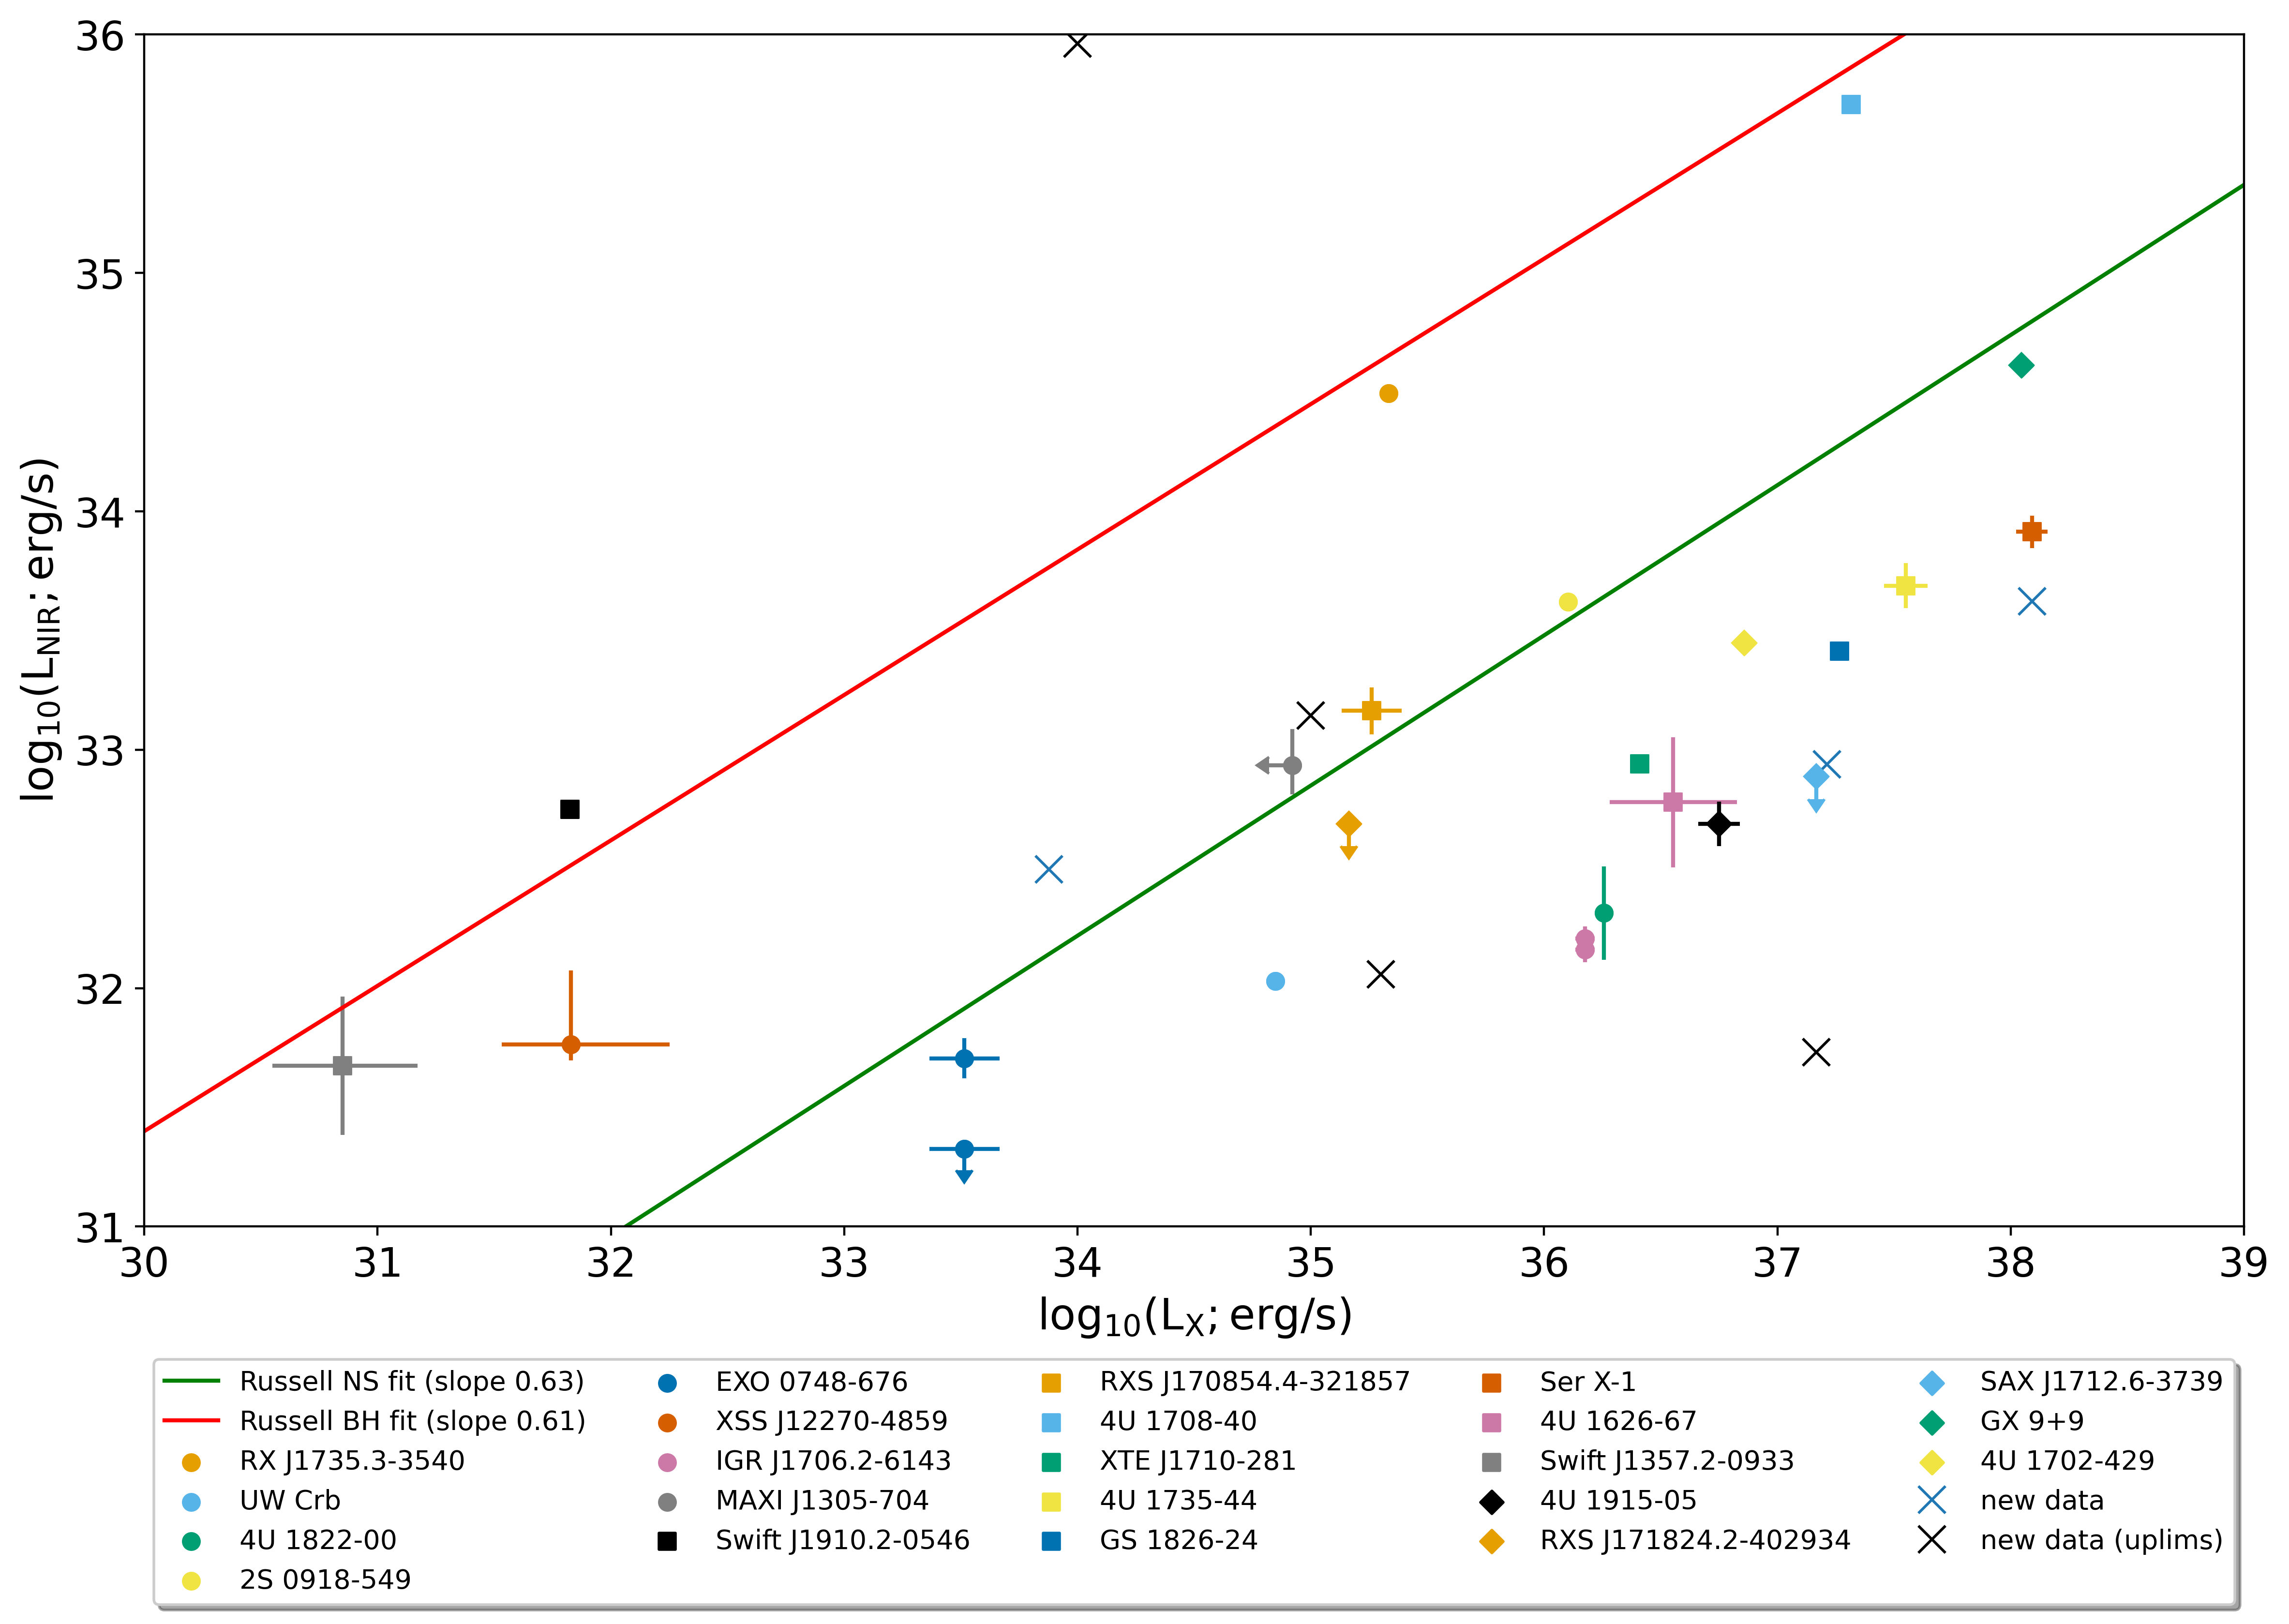

In [12]:
def plotfunc_scatter(ax, tbl, color, shape, label): 
    
    # Remove underscore from labels
    label = label.replace('_', ' ')
    # Plot regular data points 
    ax.scatter(tbl['log_L_X'], tbl['log_L_NIR'], label=label, c=color, marker=shape, zorder=10) 
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR'], yerr=[[tbl['log_L_NIR_errlow']], [tbl['log_L_NIR_errup']]], xerr=[[tbl['log_L_X_errlow']], [tbl['log_L_X_errup']]], marker=shape, fmt='o', color=color)

    # Plot points with only upplim on NIR luminosity
    ax.scatter(tbl['log_L_X'], tbl['log_L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)      
    ax.errorbar(tbl['log_L_X'], tbl['log_L_NIR_upplim'], yerr=[tbl['log_L_NIR_upplim']*arrow_scale], xerr=[[tbl['log_L_X_errlow']], [tbl['log_L_X_errup']]], uplims = True, marker=shape, fmt='o', color=color)

    # Plot points with only upplim on X-ray luminosity
    ax.scatter(tbl['log_L_X_upplim'], tbl['log_L_NIR'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR'], yerr=[[tbl['log_L_NIR_errlow']], tbl[['log_L_NIR_errup']]], xerr=[tbl['log_L_X_upplim']*arrow_scale], xuplims = True, marker=shape, fmt='o', color=color)

    # Plot points with upplims on X-ray luminosity and NIR luminosity
    ax.scatter(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], label=label, c=color, marker=shape, zorder=10)         
    ax.errorbar(tbl['log_L_X_upplim'], tbl['log_L_NIR_upplim'], yerr=[tbl['log_L_NIR_upplim']*arrow_scale], xerr=[tbl['log_L_X_upplim']*arrow_scale], uplims=True, xuplims=True, marker=shape,fmt='o', color=color)





    
fig, ax = plt.subplots(figsize = (14, 8), dpi=400)
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(np.log10(xrange), np.log10(y), c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(np.log10(xrange), np.log10(y_bh), c='r', label='Russell BH fit (slope 0.61)')
markers = ['o', 's', 'D', 'X', '*']
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 'grey']
options = np.array(np.meshgrid(markers, colors)).T.reshape(-1,2)
# print(options)

arrow_scale = 0.2 / np.log(10) / 30

i = 0
last_source = 'first'
for n, s in enumerate(tbl['Source']):

    # exclude not plotted sources from legend
    if np.isnan(tbl.iloc[n]['L_NIR']) and np.isnan(tbl.iloc[n]['L_NIR_upplim']) or np.isnan(tbl.iloc[n]['L_X']) and np.isnan(tbl.iloc[n]['L_X_upplim']):
        continue
        
    # every source gets a new shape-color combination
    if s != last_source: 
        i +=1
    shape = options[i][0]
    color = options[i][1]
    last_source = s
    
    # scatter plot the data for which luminosites are available
    try: 
        plotfunc_scatter(ax, tbl.iloc[n], color, shape, s)
    except:
        continue
    
# plot errorbar
# ax.errorbar(32, 35, yerr=[[NIR_std_low], [NIR_std_up]], xerr=[[X_std_low] , [X_std_up]], fmt='o', ms=5, color='k')

# # Plot regular extra data points 
# ax.errorbar(extra_tbl['L_X'], extra_tbl['L_NIR'], yerr=[extra_tbl['L_NIR_errlow'], extra_tbl['L_NIR_errup']], xerr=[extra_tbl['L_X_errlow'], extra_tbl['L_X_errup']], label='new data', fmt='o', ms=3)

# # Plot extra points with only upplim on NIR luminosity
# ax.errorbar(extra_tbl['L_X'], extra_tbl['L_NIR_upplim'], yerr=extra_tbl['L_NIR_upplim']*arrow_scale, xerr=[extra_tbl['L_X_errlow'], extra_tbl['L_X_errup']], uplims =[True for i in range(len(extra_tbl))], fmt='o', ms=3, color='k', label='new data (uplims)')

# Plot regular extra data points 
ax.errorbar(np.log10(extra_tbl['L_X']), np.log10(extra_tbl['L_NIR']), label='new data', fmt='x', ms=10)

# Plot extra points with only upplim on NIR luminosity
ax.errorbar(np.log10(extra_tbl['L_X']), np.log10(extra_tbl['L_NIR_upplim']), uplims =[True for i in range(len(extra_tbl))], fmt='x', ms=10, color='k', label='new data (uplims)')


ax.set_xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=16)
ax.set_ylabel(r'$\mathrm{log_{10}(L_{NIR}; erg/s)}$', fontsize=16)
ax.set_xlim(30, 39)
ax.set_ylim(31, 36)
ax.tick_params(axis='both', labelsize=15)

# remove duplicates from legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

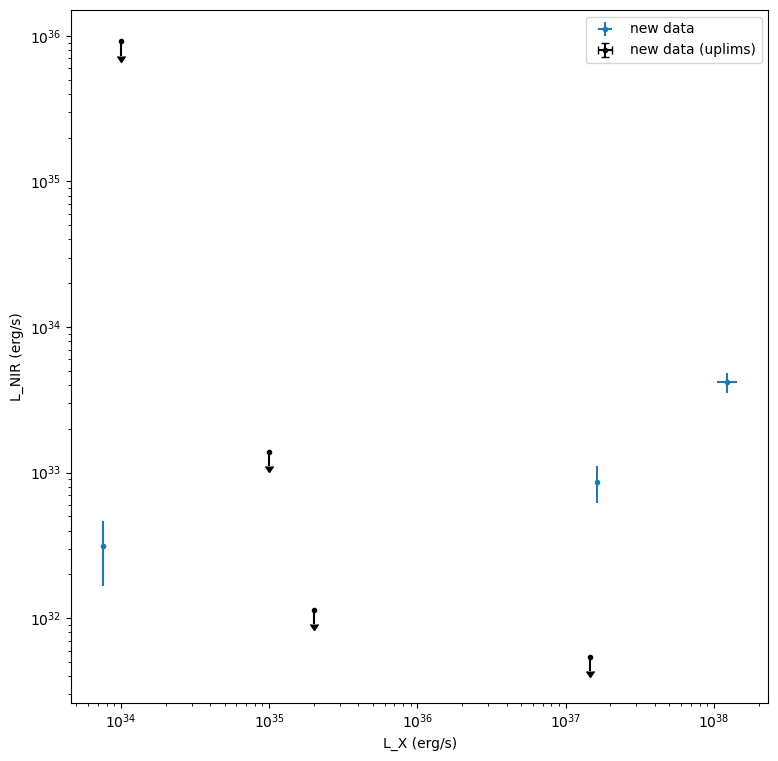

In [13]:


fig, ax = plt.subplots(figsize = (9, 9))
# xrange= np.logspace(29, 41, num=10)
# y = 10**10.8 * xrange**(0.63)
# ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
# y_bh = 10**13.1 * xrange**0.61
# ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

arrow_scale = 0.2

# Plot regular data points 
ax.errorbar(extra_tbl['L_X'], extra_tbl['L_NIR'], yerr=[extra_tbl['L_NIR_errlow'], extra_tbl['L_NIR_errup']], xerr=[extra_tbl['L_X_errlow'], extra_tbl['L_X_errup']], label='new data', fmt='o', ms=3)

# Plot points with only upplim on NIR luminosity
ax.errorbar(extra_tbl['L_X'], extra_tbl['L_NIR_upplim'], yerr=extra_tbl['L_NIR_upplim']*arrow_scale, xerr=[extra_tbl['L_X_errlow'], extra_tbl['L_X_errup']], uplims =[True for i in range(len(extra_tbl))], fmt='o', ms=3, color='k', label='new data (uplims)')

# # Plot points with only upplim on X-ray luminosity
# ax.errorbar(extra_tbl['L_X_upplim'], extra_tbl['L_NIR'], yerr=[extra_tbl['L_NIR_errlow'], extra_tbl['L_NIR_errup']], xerr=extra_tbl['L_X_upplim']*arrow_scale, xuplims =[True for i in range(len(extra_tbl))], fmt='o', ms=3, color='k')

# # Plot points with upplims on X-ray luminosity and NIR luminosity
# ax.errorbar(extra_tbl['L_X_upplim'], extra_tbl['L_NIR_upplim'], yerr=extra_tbl['L_NIR_upplim']*arrow_scale, xerr=extra_tbl['L_X_upplim']*arrow_scale, uplims=[True for i in range(len(extra_tbl))], xuplims =[True for i in range(len(extra_tbl))], fmt='o', ms=3, color='k')



ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e29, 10e39)
# ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

In [14]:
trial = extra_tbl.iloc[1]['Corrected_nH']
print(trial)
import math
if np.isnan(trial):
    print('oi')

True


In [15]:

    
display(extra_tbl)

Source Band       Date  Magnitude   Magnitude_err  \
0         4U_1556-60    J  13-5-2011       17.83           0.06   
3         4U_1708-40    J  13-5-2011       18.84           0.18   
6    AXJ_165901-4208    J  13-5-2011       18.33           0.06   
9    IGR_J16287-5021    J  13-5-2011       16.84           0.04   
12   IGR_J17350-2045    J  13-5-2011       15.35           0.06   
15   AX_J171922-3703    J  13-5-2011         NaN            NaN   
18  SAX_J1712.6-3739    J  13-5-2011         NaN            NaN   
21        4U_1705-32    J  13-5-2011         NaN            NaN   
24     XTE_J1637−498    J  20-9-2008       14.80           0.09   
27   IGR_J17379−3747    J  2-10-2008       18.30           0.10   
32  SAX_J1747.0−2853    J  18-7-2006         NaN            NaN   
35   IGR_J17464−2811    J  18-7-2006         NaN            NaN   
38   AX_J1754.2−2754    J   3-5-2007         NaN            NaN   
41           Ser_X−1    J  12-5-2010       17.34           0.10   

    Magnitude_upplim  Corrected_nH   Literature NIR Telescope            nH  \
0                NaN          True  Revnivtsev+2013      IRSF           NaN   
3                NaN          True  Revnivtsev+2013      IRSF  1.010000e+22   
6                NaN          True  Revnivtsev+2013      IRSF           NaN   
9                NaN          True  Revnivtsev+2013      IRSF  1.210000e+22   
12               NaN          True  Revnivtsev+2013      IRSF           NaN   
15              19.5          True  Revnivtsev+2013      IRSF           NaN   
18              20.6          True  Revnivtsev+2013      IRSF           NaN   
21              20.8          True  Revnivtsev+2013      IRSF           NaN   
24               NaN         False      Curran+2011     ISAAC           NaN   
27               NaN         False      Curran+2011     ISAAC           NaN   
32              20.2         False  Zolotukhin+2015     UKIRT  1.700000e+21   
35              20.0         False  Zolotukhin+2015     UKIRT  7.500000e+22   
38              18.7         False  Zolotukhin+2015     UKIRT  7.680000e+21   
41               NaN         False  Zolotukhin+2015     UKIRT  4.400000e+21   

    ... mag_uplim_dered         F_NIR         L_NIR           L_X  \
0   ...             NaN  1.178165e-13           NaN           NaN   
3   ...             NaN  4.647359e-14  8.688349e+32  1.626486e+37   
6   ...             NaN  7.433721e-14           NaN           NaN   
9   ...             NaN  2.932286e-13  3.157619e+32  7.537920e+33   
12  ...             NaN  1.156661e-12           NaN           NaN   
15  ...       19.500000           NaN           NaN           NaN   
18  ...       20.600000           NaN           NaN  1.465707e+37   
21  ...       20.800000           NaN           NaN           NaN   
24  ...             NaN           NaN           NaN           NaN   
27  ...             NaN           NaN           NaN           NaN   
32  ...       19.932179           NaN           NaN  2.000000e+35   
35  ...        8.184358           NaN           NaN  1.000000e+34   
38  ...       17.490078           NaN           NaN  1.000000e+35   
41  ...             NaN  3.503322e-13  4.191707e+33  1.232390e+38   

     L_NIR_errup  L_NIR_errlow     L_X_errup    L_X_errlow  F_NIR_upplim  \
0            NaN           NaN           NaN           NaN           NaN   
3   2.457436e+32  2.457436e+32           NaN           NaN           NaN   
6            NaN           NaN           NaN           NaN           NaN   
9   1.488516e+32  1.488516e+32           NaN           NaN           NaN   
12           NaN           NaN           NaN           NaN           NaN   
15           NaN           NaN           NaN           NaN  2.530500e-14   
18           NaN           NaN           NaN           NaN  9.187689e-15   
21           NaN           NaN           NaN           NaN  7.641986e-15   
24           NaN           NaN           NaN           NaN           NaN   
27           NaN          

In [16]:
print(mag_cal)
print(mag_dered)
print(Flux)
print(L)

19.01213057479


NameError: name 'mag_dered' is not defined